In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/Users/natt/Downloads/2022_DataSceience/BD&AI_2022/00_Lab/W2_Preprocessing/W2_2_HW_data/HW2_Housing Survey.csv")

In [4]:
df.tail()

,RT,SERIALNO,DIVISION,PUMA,REGION,ST,ADJUST,WGTP,NP,TYPE,...,wgtp71,wgtp72,wgtp73,wgtp74,wgtp75,wgtp76,wgtp77,wgtp78,wgtp79,wgtp80
6491,H,1357238,8,300,4,16,1015675,108,2,1,...,198,88,112,26,64,106,142,106,33,111
6492,H,1357340,8,400,4,16,1015675,58,2,1,...,66,101,62,52,105,75,20,127,105,68
6493,H,1357874,8,900,4,16,1015675,32,2,1,...,7,8,12,37,44,36,28,33,48,59
6494,H,1357880,8,500,4,16,1015675,123,2,1,...,201,123,38,104,186,203,132,118,201,125
6495,H,1358490,8,700,4,16,1015675,353,2,1,...,312,558,372,102,108,381,340,114,563,358


In [5]:
df.shape

(6496, 188)

In [6]:
df1=df.loc[:,['VAL','NP','FINCP']]

In [7]:
df1.head()

,VAL,NP,FINCP
0,17.0,4,105600.0
1,NaN,1,NaN
2,18.0,2,9400.0
3,19.0,4,66000.0
4,20.0,4,93000.0


In [8]:
df1.describe(include='all').round(1)

,VAL,NP,FINCP
count,4420.0,6496.0,4051.0
mean,15.3,2.3,61311.4
std,4.5,1.6,48632.1
min,1.0,0.0,-14299.0
25%,13.0,1.0,30400.0
50%,16.0,2.0,50700.0
75%,18.0,3.0,76500.0
max,24.0,11.0,472600.0


<AxesSubplot:>

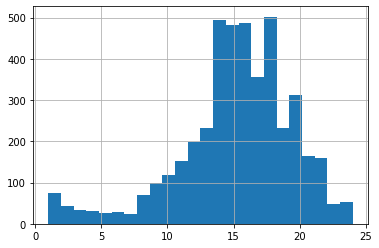

In [13]:
df1.VAL.hist(bins=24)

## How many properties are worth $1,000,000 or more?

In [10]:
# VAL = Property value 24 for 1M+
print("Number of properties worth 1M + =", len(df1[df1['VAL']==24]))
print("Percent of missing values",np.round(df1['VAL'].isna().sum()*100/len(df1),2),"%")

Number of properties worth 1M + = 53
Percent of missing values 31.96 %


In [11]:
df1['VAL'].value_counts()

18.0    502
14.0    495
16.0    486
15.0    483
17.0    357
20.0    312
13.0    233
19.0    232
12.0    199
21.0    164
22.0    159
11.0    152
10.0    119
9.0      99
1.0      75
8.0      70
24.0     53
23.0     47
2.0      42
3.0      33
4.0      30
6.0      29
5.0      26
7.0      23
Name: VAL, dtype: int64

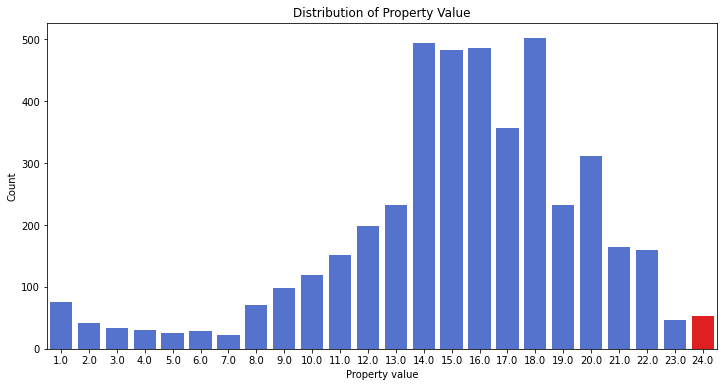

In [12]:
bar_color=['royalblue' for i in range(23)]
bar_color.append('red')
plt.figure(figsize=(12,6));
sns.countplot(x=df['VAL'],palette=bar_color)
plt.xlabel("Property value")
plt.ylabel("Count")
plt.title("Distribution of Property Value");

<AxesSubplot:>

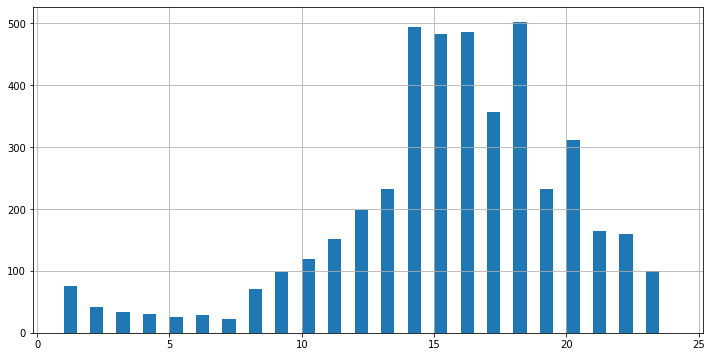

In [12]:
df['VAL'].hist(bins=23,figsize=(12,6),width=0.5)

## How many people recorded in a house on average?

In [14]:
#NP = Number of person records following this housing record

<AxesSubplot:xlabel='NP', ylabel='count'>

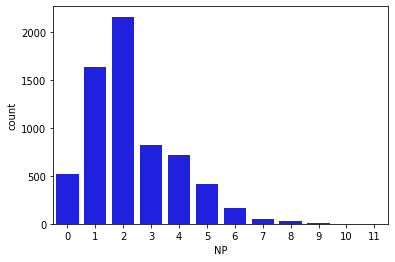

In [15]:
sns.countplot(x=df['NP'],color='blue')

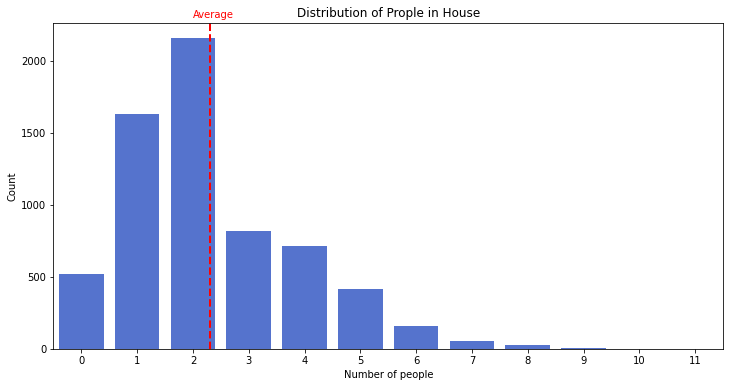

In [16]:
plt.figure(figsize=(12,6));
sns.countplot(x=df['NP'],palette=bar_color)
plt.axvline(x=df['NP'].mean(),color='red',ls='--',lw=2)
plt.xlabel("Number of people")
plt.ylabel("Count")
plt.title("Distribution of Prople in House");
plt.text(2, 2300, "Average", fontsize=10,c='red');

## Draw a graph to show the relationship between the property value and the number of persons recorded?

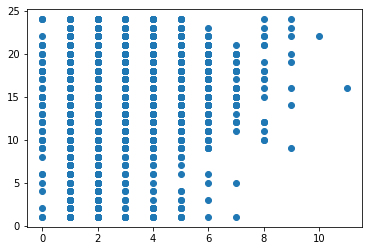

In [17]:
plt.scatter(df1['NP'],df1['VAL'])


[]

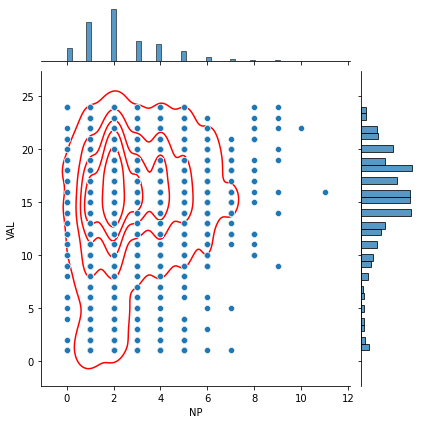

In [18]:
g = sns.jointplot(data=df1, x="NP" ,y="VAL")
g.plot_joint(sns.kdeplot, color="r", zorder=0, levels=6)
plt.ylabel("Property Value")
plt.xlabel("Number of people")
plt.plot()

## Normalize family income into a range (0~1). Compare before vs after in histogram.

In [19]:
min=df1['FINCP'].min()
max=df1['FINCP'].max()
df1['n1']=(df1['FINCP']-min)/(max-min)

In [29]:
from sklearn.preprocessing import MinMaxScaler,PowerTransformer

In [21]:
#FINCP = Family income 

In [24]:
df1['FINCP'].values.reshape(-1,1)

array([[105600.],
       [    nan],
       [  9400.],
       ...,
       [ 18000.],
       [ 33000.],
       [ 32600.]])

In [31]:
#Normalize
scaler = PowerTransformer()
scaler.fit(df1['FINCP'].values.reshape(-1,1))
df1['n2']=scaler.transform(df1['FINCP'].values.reshape(-1,1))
#normalized = scaler.fit_transform(df['FINCP'].values.reshape(-1,1))

In [32]:
df1.head(10)

,VAL,NP,FINCP,n1,n2
0,17.0,4,105600.0,0.246250,0.973353
1,NaN,1,NaN,NaN,NaN
2,18.0,2,9400.0,0.048673,-1.210224
3,19.0,4,66000.0,0.164919,0.162543
4,20.0,4,93000.0,0.220372,0.722429
5,15.0,4,61000.0,0.154650,0.054735
6,NaN,1,NaN,NaN,NaN
7,NaN,1,NaN,NaN,NaN
8,13.0,2,209000.0,0.458615,2.877893
9,1.0,2,NaN,NaN,NaN


In [27]:
df1.describe()

,VAL,NP,FINCP,n1,n2
count,4420.000000,6496.000000,4051.000000,4051.000000,4051.000000
mean,15.287783,2.298491,61311.406813,0.155290,0.155290
std,4.532799,1.563549,48632.063845,0.099881,0.099881
min,1.000000,0.000000,-14299.000000,0.000000,0.000000
25%,13.000000,1.000000,30400.000000,0.091803,0.091803
50%,16.000000,2.000000,50700.000000,0.133496,0.133496
75%,18.000000,3.000000,76500.000000,0.186484,0.186484
max,24.000000,11.000000,472600.000000,1.000000,1.000000


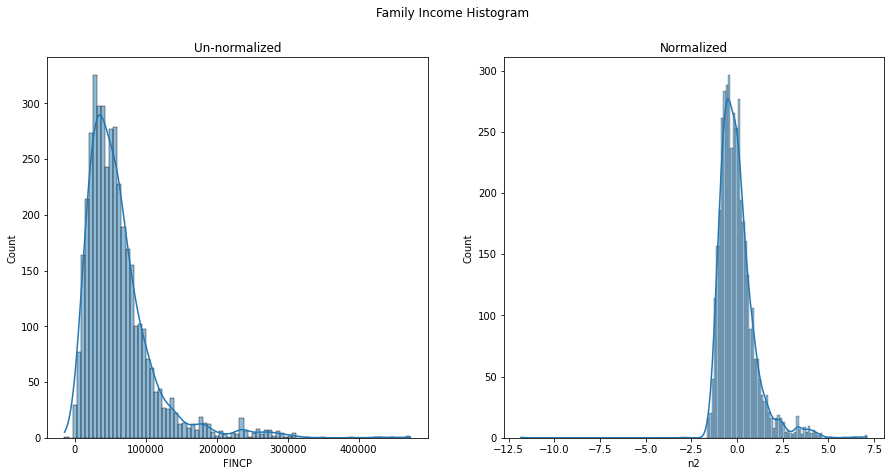

In [34]:
f, axes = plt.subplots(1, 2,figsize=(15,7))
f.suptitle("Family Income Histogram")
sns.histplot(df1['FINCP'],ax=axes[0],kde=True);
axes[0].set_title("Un-normalized")
sns.histplot(df1['n2'],ax=axes[1],kde=True,legend=False);
axes[1].set_title("Normalized");

## Create 5 bins for family income.

[]

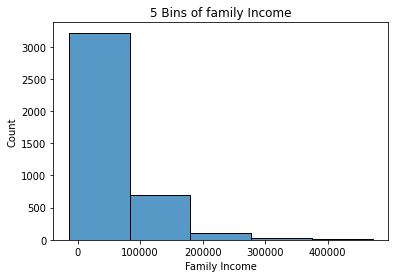

In [35]:
sns.histplot(df1['FINCP'],bins=5)
plt.ylabel("Count")
plt.xlabel("Family Income")
plt.title("5 Bins of family Income")
plt.plot()

[]

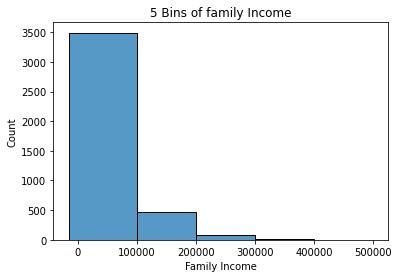

In [36]:
sns.histplot(df1['FINCP'],bins=[-15000,100000,200000,300000,400000,500000])
plt.ylabel("Count")
plt.xlabel("Family Income")
plt.title("5 Bins of family Income")
plt.plot()